<a href="https://colab.research.google.com/github/jglombitza/Introspection_tutorial/blob/solutions/activation_maximization_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution
## Activation maximization
In this task, we use the approach of activation maximization to visualize to which patterns features of a CNN trained using on MNIST are sensitive. This will give us a deeper understanding of the working principle of CNNs.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

KTF = keras.backend
layers = keras.layers

print("keras", keras.__version__)

keras 2.8.0


### Download and preprocess data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32)[...,np.newaxis] / 255.
x_test = x_test.astype(np.float32)[...,np.newaxis] / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Set up a convolutional neural network with at least 4 CNN layers.

In [3]:
model = keras.models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.5),
    layers.Dense(10),
    layers.Activation('softmax', name='softmax_layer')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        9280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

#### compile and train model

In [4]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy'])


results = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=7,
                    verbose=1,
                    validation_split=0.1
                    )

Epoch 1/7
540/540 [==============================] - 19s 26ms/step - loss: 0.4498 - accuracy: 0.8552 - val_loss: 0.0522 - val_accuracy: 0.9845
Epoch 2/7
540/540 [==============================] - 12s 23ms/step - loss: 0.1360 - accuracy: 0.9609 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 3/7
540/540 [==============================] - 12s 23ms/step - loss: 0.0940 - accuracy: 0.9722 - val_loss: 0.0339 - val_accuracy: 0.9903
Epoch 4/7
540/540 [==============================] - 12s 23ms/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 0.0293 - val_accuracy: 0.9930
Epoch 5/7
540/540 [==============================] - 12s 23ms/step - loss: 0.0648 - accuracy: 0.9812 - val_loss: 0.0263 - val_accuracy: 0.9923
Epoch 6/7
540/540 [==============================] - 12s 23ms/step - loss: 0.0572 - accuracy: 0.9839 - val_loss: 0.0274 - val_accuracy: 0.9923
Epoch 7/7
540/540 [==============================] - 13s 23ms/step - loss: 0.0497 - accuracy: 0.9859 - val_loss: 0.0249 - val_accuracy: 0.9928

### Implementation of activation maximization
Select a layer you want to visualize and perform activation maximization.

In [5]:
gradient_updates = 50
step_size = 1.

def normalize(x):
    '''Normalize gradients via l2 norm'''
    return x / (KTF.sqrt(KTF.mean(KTF.square(x))) + KTF.epsilon())


In [6]:
visualized_feature = []
layer_dict = layer_dict = dict([(layer.name, layer) for layer in model.layers[:]])
layer_name = "conv2d_3"

layer_output = layer_dict[layer_name].output
print("shape of layer output (tensor of activations):", layer_output.shape)
sub_model = keras.models.Model([model.inputs], [layer_output])

# activation maximization for feature map
for filter_index in range(layer_output.shape[-1]):
    print('Processing feature map %d' % (filter_index+1))
    input_img = KTF.variable(np.random.uniform(0,1, (1, 28, 28, 1)))

    for i in range(gradient_updates):

        with tf.GradientTape() as gtape:
            layer_output = sub_model(input_img)
            loss = KTF.mean(layer_output[0, :, :, filter_index])  # objective
            grads = gtape.gradient(loss, input_img)
            grads = normalize(grads)
            input_img.assign_add(step_size * grads)

    visualized_feature.append(input_img.numpy())  # cast to numpy array

shape of layer output (tensor of activations): (None, 14, 14, 64)
Processing feature map 1
Processing feature map 2
Processing feature map 3
Processing feature map 4
Processing feature map 5
Processing feature map 6
Processing feature map 7
Processing feature map 8
Processing feature map 9
Processing feature map 10
Processing feature map 11
Processing feature map 12
Processing feature map 13
Processing feature map 14
Processing feature map 15
Processing feature map 16
Processing feature map 17
Processing feature map 18
Processing feature map 19
Processing feature map 20
Processing feature map 21
Processing feature map 22
Processing feature map 23
Processing feature map 24
Processing feature map 25
Processing feature map 26
Processing feature map 27
Processing feature map 28
Processing feature map 29
Processing feature map 30
Processing feature map 31
Processing feature map 32
Processing feature map 33
Processing feature map 34
Processing feature map 35
Processing feature map 36
Process

#### Plot images to visualize to which patterns the respective feature maps are sensitive.

In [7]:
def deprocess_image(x):
    # reprocess visualization to format of "MNIST images"
    x -= x.mean()
    x /= (x.std() + KTF.epsilon())
    # x *= 0.1
    x += 0.5
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

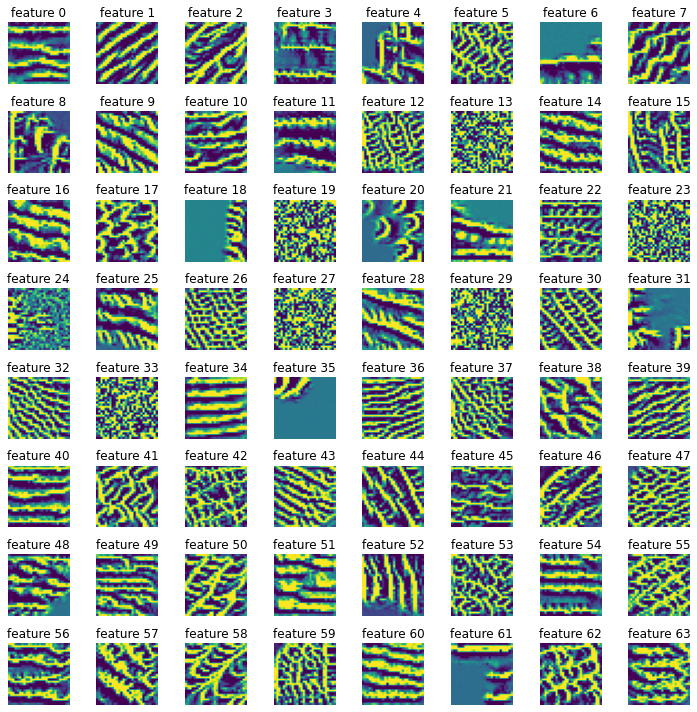

In [8]:
plt.figure(figsize=(10,10))

for i, feature_ in enumerate(visualized_feature):
    feature_image = deprocess_image(feature_)
    ax = plt.subplot(8, 8, 1+i)
    plt.imshow(feature_image.squeeze())
    ax.axis('off')
    plt.title("feature %s" % i)
    
plt.tight_layout()

# Deep dream on MNIST

In [9]:
visualized_layer = []
layer_dict = dict([(layer.name, layer) for layer in model.layers[:] if "conv" in layer.name])

# activation maximization with deep dream objective
for layer_name, layer in layer_dict.items():
    print('Processing %s' % layer_name)
    sub_model = keras.models.Model([model.inputs], [layer.output])
    input_img = KTF.variable(np.random.uniform(0,1, (1, 28, 28, 1)))

    for i in range(gradient_updates):

        with tf.GradientTape() as gtape:
            layer_output = sub_model(input_img)
            loss = KTF.mean(layer_output[:, :, :, :]**2)  # objective
            grads = gtape.gradient(loss, input_img)
            grads = normalize(grads)
            input_img.assign_add(step_size * grads)

    visualized_layer.append(input_img.numpy())  # cast to numpy array

Processing conv2d
Processing conv2d_1
Processing conv2d_2
Processing conv2d_3
Processing conv2d_4
Processing conv2d_5


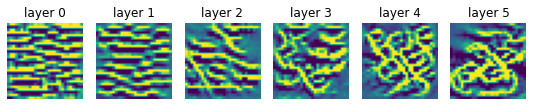

In [10]:
plt.figure(figsize=(10,10))

for i, feature_ in enumerate(visualized_layer):
    feature_image = deprocess_image(feature_)
    ax = plt.subplot(8, 8, 1+i)
    plt.imshow(feature_image.squeeze())
    ax.axis('off')
    plt.title("layer %s" % i)
    
plt.tight_layout()